In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix

import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Activation, Dropout, GlobalMaxPool1D, Conv1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import text, sequence
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras import utils

C:\Users\gprak\anaconda3\envs\my36v2\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\gprak\anaconda3\envs\my36v2\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\gprak\anaconda3\envs\my36v2\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\gprak\anaconda3\envs\my36v2\lib\site-packages\tensorflow\pyth

In [2]:
df = pd.read_csv('../Zycus/86b13d9a4b8e11ec/project/training_data.csv')
df.head()

,title,category
0,The Three Amigos,None
1,Home Essentials Blue Floral Glass Vintage Styl...,Home & Kitchen
2,Cooper Wiring Quiet Toggle Switch Single Pole ...,Tools & Home Improvement
3,Baseboarders&reg; Wall Brackets,Tools & Home Improvement
4,The Great Wave Off Kanagawa Custom Rectangle M...,Office Products


In [3]:
df =df[df['category']!='None']
df.head()

,title,category
1,Home Essentials Blue Floral Glass Vintage Styl...,Home & Kitchen
2,Cooper Wiring Quiet Toggle Switch Single Pole ...,Tools & Home Improvement
3,Baseboarders&reg; Wall Brackets,Tools & Home Improvement
4,The Great Wave Off Kanagawa Custom Rectangle M...,Office Products
5,Nemcor Pittsburgh Penguins NHL #1 Ultimate Fan...,Home & Kitchen


In [4]:
df.shape

(10065, 2)

In [5]:
df.columns

Index(['title', 'category'], dtype='object')

In [6]:
sentences = df['title']
y = df['category']

sentences_train, sentences_test, train_y, test_y = train_test_split(sentences, y, test_size=0.25, random_state=42)

In [7]:
tokenize = Tokenizer(num_words=1000)
tokenize.fit_on_texts(sentences_train)

X_train = tokenize.texts_to_sequences(sentences_train)
X_test = tokenize.texts_to_sequences(sentences_test)

vocab_size = len(tokenize.word_index) + 1  

print(sentences_train[2])
print(X_train[2])

Cooper Wiring Quiet Toggle Switch Single Pole Lighted 15 A 120 V Ivory Ul Boxed
[214, 6, 97, 52, 565, 931, 727]


In [8]:
maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

print(X_train[0, :])

[304 726 294 145 563  26 304 726   7  92 145 442   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]


In [9]:
encoder = LabelEncoder()
encoder.fit(train_y)
y_train = encoder.transform(train_y)
y_test = encoder.transform(test_y)

num_classes = np.max(y_train) + 1
print(num_classes)
y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)

6


# Adding Embedding Layer

In [10]:
embedding_dim = 16

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dense(6, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 16)           290640    
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                25616     
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 102       
Total params: 316,358
Trainable params: 316,358
Non-trainable params: 0
_________________________________________________________________


In [11]:
history = model.fit(X_train, y_train,
                    batch_size=32,
                    epochs=15,
                    validation_data=(X_test, y_test))


Train on 7548 samples, validate on 2517 samples
Epoch 1/15
7548/7548 [==============================] - 1s 150us/step - loss: 1.3370 - accuracy: 0.5040 - val_loss: 1.1598 - val_accuracy: 0.5598
Epoch 2/15
7548/7548 [==============================] - 1s 132us/step - loss: 1.0380 - accuracy: 0.5995 - val_loss: 1.0093 - val_accuracy: 0.6210
Epoch 3/15
7548/7548 [==============================] - 1s 123us/step - loss: 0.9112 - accuracy: 0.6571 - val_loss: 0.9450 - val_accuracy: 0.6496
Epoch 4/15
7548/7548 [==============================] - 1s 136us/step - loss: 0.8292 - accuracy: 0.6969 - val_loss: 0.9032 - val_accuracy: 0.6786
Epoch 5/15
7548/7548 [==============================] - 2s 285us/step - loss: 0.7576 - accuracy: 0.7305 - val_loss: 0.8590 - val_accuracy: 0.6973
Epoch 6/15
7548/7548 [==============================] - 2s 281us/step - loss: 0.6871 - accuracy: 0.7582 - val_loss: 0.8380 - val_accuracy: 0.7116
Epoch 7/15
7548/7548 [==============================] - 2s 289us/step - los

In [12]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9441
Testing Accuracy:  0.7489


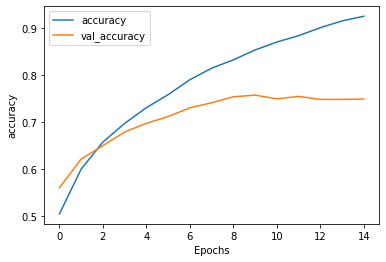

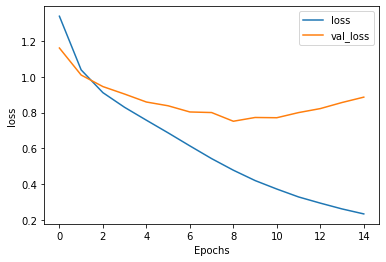

In [13]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

# Adding Flatten layer and then comparing results

In [14]:
model2 = Sequential()
model2.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=maxlen))
model2.add(Flatten())
model2.add(Dense(16, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(6, activation='softmax'))

model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 16)           290640    
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 16)                25616     
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 102       
Total params: 316,358
Trainable params: 316,358
Non-trainable params: 0
_________________________________________________________________


In [15]:
history_two = model2.fit(X_train, y_train,
                        batch_size=32,
                        epochs=15,
                        validation_data=(X_test, y_test))

Train on 7548 samples, validate on 2517 samples
Epoch 1/15
7548/7548 [==============================] - 3s 346us/step - loss: 1.5116 - accuracy: 0.4735 - val_loss: 1.3530 - val_accuracy: 0.4919
Epoch 2/15
7548/7548 [==============================] - 2s 305us/step - loss: 1.2726 - accuracy: 0.5195 - val_loss: 1.1088 - val_accuracy: 0.5777
Epoch 3/15
7548/7548 [==============================] - 2s 304us/step - loss: 1.0967 - accuracy: 0.5786 - val_loss: 0.9626 - val_accuracy: 0.6706
Epoch 4/15
7548/7548 [==============================] - 2s 302us/step - loss: 0.9684 - accuracy: 0.6328 - val_loss: 0.8607 - val_accuracy: 0.6988
Epoch 5/15
7548/7548 [==============================] - 2s 302us/step - loss: 0.8277 - accuracy: 0.7050 - val_loss: 0.7846 - val_accuracy: 0.7398
Epoch 6/15
7548/7548 [==============================] - 2s 307us/step - loss: 0.7397 - accuracy: 0.7431 - val_loss: 0.7607 - val_accuracy: 0.7465
Epoch 7/15
7548/7548 [==============================] - 2s 291us/step - loss

In [16]:
loss, accuracy = model2.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model2.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9026
Testing Accuracy:  0.7426


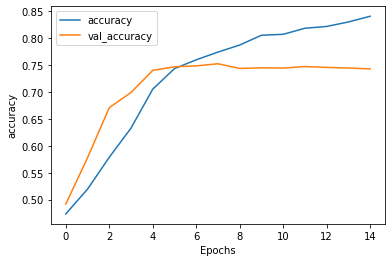

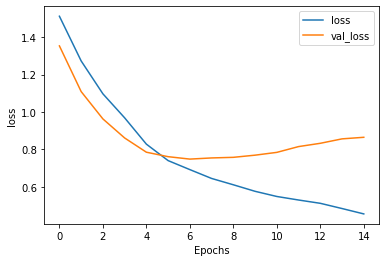

In [17]:
plot_graphs(history_two, "accuracy")
plot_graphs(history_two, "loss")

# Adding Max pooling layer and then comparing results

In [18]:
embedding_dim = 50

model3 = Sequential()
model3.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=maxlen))
model3.add(GlobalMaxPool1D())
model3.add(Dense(16, activation='relu'))
model3.add(Dense(6, activation='softmax'))

model3.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

model3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 50)           908250    
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 50)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 16)                816       
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 102       
Total params: 909,168
Trainable params: 909,168
Non-trainable params: 0
_________________________________________________________________


In [19]:
history_3 = model3.fit(X_train, y_train,
                       batch_size=32,
                       epochs=15,
                       validation_data=(X_test, y_test))

Train on 7548 samples, validate on 2517 samples
Epoch 1/15
7548/7548 [==============================] - 5s 633us/step - loss: 1.4588 - accuracy: 0.4850 - val_loss: 1.2793 - val_accuracy: 0.4919
Epoch 2/15
7548/7548 [==============================] - 4s 580us/step - loss: 1.0824 - accuracy: 0.5809 - val_loss: 0.9111 - val_accuracy: 0.7068
Epoch 3/15
7548/7548 [==============================] - 4s 583us/step - loss: 0.7271 - accuracy: 0.7757 - val_loss: 0.7217 - val_accuracy: 0.7533
Epoch 4/15
7548/7548 [==============================] - 4s 584us/step - loss: 0.5527 - accuracy: 0.8143 - val_loss: 0.6660 - val_accuracy: 0.7668
Epoch 5/15
7548/7548 [==============================] - 4s 591us/step - loss: 0.4588 - accuracy: 0.8447 - val_loss: 0.6539 - val_accuracy: 0.7676
Epoch 6/15
7548/7548 [==============================] - 4s 571us/step - loss: 0.3934 - accuracy: 0.8670 - val_loss: 0.6574 - val_accuracy: 0.7775
Epoch 7/15
7548/7548 [==============================] - 4s 579us/step - loss

In [20]:
loss, accuracy = model3.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model3.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9760
Testing Accuracy:  0.7592


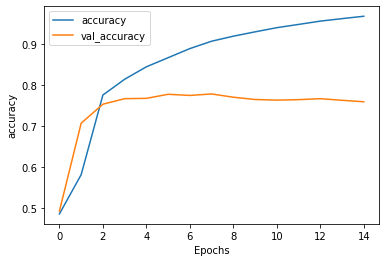

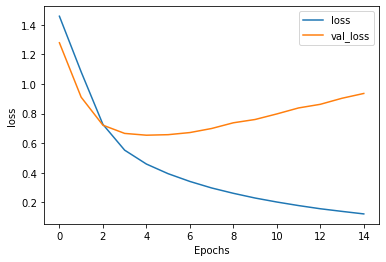

In [21]:
plot_graphs(history_3, "accuracy")
plot_graphs(history_3, "loss")

# Adding Dropout layer and then comparing results

In [22]:
embedding_dim = 50

model4 = Sequential()
model4.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=maxlen))
model4.add(GlobalMaxPool1D())
model4.add(Dropout(0.2))
model4.add(Dense(16, activation='relu'))
model4.add(Dropout(0.2))
model4.add(Dense(6, activation='softmax'))

model4.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

model4.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 100, 50)           908250    
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 50)                0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 16)                816       
_________________________________________________________________
dropout_3 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 6)                 102       
Total params: 909,168
Trainable params: 909,168
Non-trainable params: 0
________________________________________________

In [23]:
history_4 = model4.fit(X_train, y_train,
                       batch_size=32,
                       epochs=15,
                       validation_data=(X_test, y_test))

Train on 7548 samples, validate on 2517 samples
Epoch 1/15
7548/7548 [==============================] - 5s 660us/step - loss: 1.5034 - accuracy: 0.4634 - val_loss: 1.3013 - val_accuracy: 0.4919
Epoch 2/15
7548/7548 [==============================] - 4s 592us/step - loss: 1.1459 - accuracy: 0.5768 - val_loss: 0.9442 - val_accuracy: 0.6861
Epoch 3/15
7548/7548 [==============================] - 4s 588us/step - loss: 0.8661 - accuracy: 0.7091 - val_loss: 0.7767 - val_accuracy: 0.7449
Epoch 4/15
7548/7548 [==============================] - 4s 590us/step - loss: 0.7254 - accuracy: 0.7597 - val_loss: 0.7208 - val_accuracy: 0.7533
Epoch 5/15
7548/7548 [==============================] - 4s 594us/step - loss: 0.6487 - accuracy: 0.7825 - val_loss: 0.6992 - val_accuracy: 0.7561
Epoch 6/15
7548/7548 [==============================] - 4s 594us/step - loss: 0.5925 - accuracy: 0.8003 - val_loss: 0.6951 - val_accuracy: 0.7620
Epoch 7/15
7548/7548 [==============================] - 4s 596us/step - loss

In [24]:
loss, accuracy = model4.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model4.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9277
Testing Accuracy:  0.7747


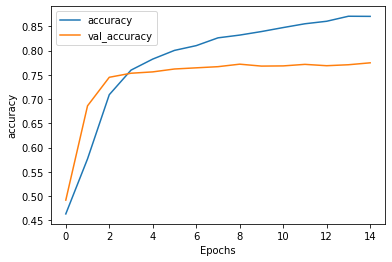

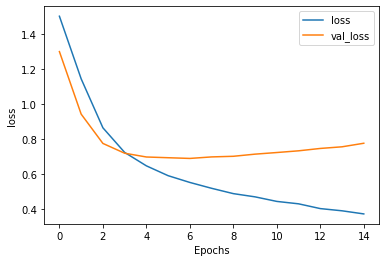

In [25]:
plot_graphs(history_4, "accuracy")
plot_graphs(history_4, "loss")

# Adding a single Convolutional layer and then comparing results

In [33]:
embedding_dim = 50

model5 = Sequential()
model5.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=maxlen))
model5.add(Conv1D(128, 5, activation='relu'))
model5.add(GlobalMaxPool1D())
model5.add(Dense(10, activation='relu'))
model5.add(Dense(6, activation='softmax'))

model5.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

model5.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 100, 50)           908250    
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 96, 128)           32128     
_________________________________________________________________
global_max_pooling1d_4 (Glob (None, 128)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1290      
_________________________________________________________________
dense_12 (Dense)             (None, 6)                 66        
Total params: 941,734
Trainable params: 941,734
Non-trainable params: 0
_________________________________________________________________


In [34]:
history_5 = model5.fit(X_train, y_train,
                       batch_size=32,
                       epochs=15,
                       validation_data=(X_test, y_test))

Train on 7548 samples, validate on 2517 samples
Epoch 1/15
7548/7548 [==============================] - 8s 1ms/step - loss: 1.2745 - accuracy: 0.5041 - val_loss: 0.9218 - val_accuracy: 0.6587
Epoch 2/15
7548/7548 [==============================] - 7s 972us/step - loss: 0.7392 - accuracy: 0.7158 - val_loss: 0.7187 - val_accuracy: 0.7505
Epoch 3/15
7548/7548 [==============================] - 7s 973us/step - loss: 0.5442 - accuracy: 0.8062 - val_loss: 0.6743 - val_accuracy: 0.7672
Epoch 4/15
7548/7548 [==============================] - 7s 964us/step - loss: 0.4553 - accuracy: 0.8389 - val_loss: 0.6879 - val_accuracy: 0.7660
Epoch 5/15
7548/7548 [==============================] - 7s 936us/step - loss: 0.3918 - accuracy: 0.8637 - val_loss: 0.7280 - val_accuracy: 0.7600
Epoch 6/15
7548/7548 [==============================] - 7s 932us/step - loss: 0.3392 - accuracy: 0.8849 - val_loss: 0.7758 - val_accuracy: 0.7573
Epoch 7/15
7548/7548 [==============================] - 7s 933us/step - loss: 

In [35]:
loss, accuracy = model5.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model5.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9815
Testing Accuracy:  0.7382


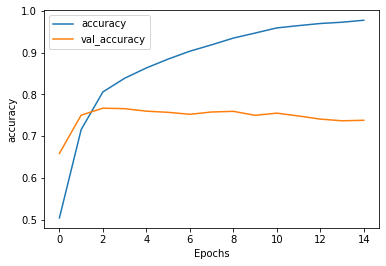

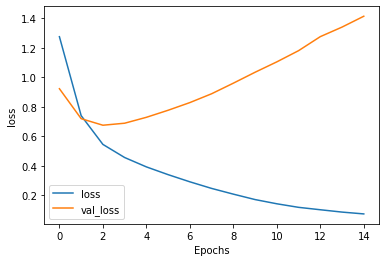

In [36]:
plot_graphs(history_5, "accuracy")
plot_graphs(history_5, "loss")

# Doing validation on test dataset using reverse mapping from name to id and finally saving the results in a csv file 

In [56]:
df2 = pd.read_csv('../Zycus/86b13d9a4b8e11ec/project/testing_data.csv')
toPredictSentences =df2['title']

In [57]:
X_validate = tokenize.texts_to_sequences(toPredictSentences)

In [58]:
X_validate = pad_sequences(X_validate, padding='post', maxlen=maxlen)

In [59]:
y_validate = model4.predict(X_validate)

In [60]:
y_validate

array([[1.90162414e-03, 2.70509569e-04, 7.91086733e-01, 2.78029200e-02,
        1.19895572e-02, 1.66948691e-01],
       [1.42003326e-02, 6.17269337e-01, 1.45750687e-01, 3.43052447e-02,
        1.85750768e-01, 2.72360677e-03],
       [1.44271075e-06, 9.91940975e-01, 1.67256547e-03, 1.42852205e-05,
        6.37074048e-03, 4.51010962e-09],
       ...,
       [8.47922266e-03, 8.31211160e-04, 1.57263910e-03, 6.10987432e-02,
        9.21987474e-01, 6.03072159e-03],
       [4.91085617e-10, 4.55267184e-08, 9.99996066e-01, 1.65026776e-07,
        2.03951203e-07, 3.53582891e-06],
       [2.55423720e-06, 9.89786386e-01, 1.34400360e-03, 2.65497238e-05,
        8.84036347e-03, 5.22699040e-09]], dtype=float32)

In [61]:
integer_mapping = {l: i for i, l in enumerate(encoder.classes_)}
print(integer_mapping)
reverse_mapping = {i: l for i, l in enumerate(encoder.classes_)}
print(reverse_mapping)

{'Electronics': 0, 'Grocery & Gourmet Food': 1, 'Home & Kitchen': 2, 'Industrial & Scientific': 3, 'Office Products': 4, 'Tools & Home Improvement': 5}
{0: 'Electronics', 1: 'Grocery & Gourmet Food', 2: 'Home & Kitchen', 3: 'Industrial & Scientific', 4: 'Office Products', 5: 'Tools & Home Improvement'}


In [62]:
actual_results = [reverse_mapping[np.argmax(y_validate[i])] for i in range(len(y_validate))]
print(actual_results[:10])

['Home & Kitchen', 'Grocery & Gourmet Food', 'Grocery & Gourmet Food', 'Home & Kitchen', 'Tools & Home Improvement', 'Grocery & Gourmet Food', 'Office Products', 'Tools & Home Improvement', 'Grocery & Gourmet Food', 'Home & Kitchen']


In [63]:
results=pd.DataFrame(data={'predicted':actual_results})
results.head(20)

,predicted
0,Home & Kitchen
1,Grocery & Gourmet Food
2,Grocery & Gourmet Food
3,Home & Kitchen
4,Tools & Home Improvement
5,Grocery & Gourmet Food
6,Office Products
7,Tools & Home Improvement
8,Grocery & Gourmet Food
9,Home & Kitchen


In [64]:
df2['category']=actual_results

In [65]:
df2.head(10)

,title,category
0,Pom Pom Hair Band Rabbit Light Grey Decorative...,Home & Kitchen
1,Mariposa Golf Ball Napkin Weight,Grocery & Gourmet Food
2,Mediterranean Snack Food Roasted Garlic Hummuz...,Grocery & Gourmet Food
3,John Deere 0071750GX22269 Genuine Original Equ...,Home & Kitchen
4,"Protech Wood Cleanr Gl,PERFORMANCE COATINGS IN...",Tools & Home Improvement
5,tic tac Holiday Candy Cane and Cherry Apple Tw...,Grocery & Gourmet Food
6,DENIED Red Office Stock Self-Inking Rubber Stamp,Office Products
7,Replacement Message Board Face with Tracks for...,Tools & Home Improvement
8,Bundle - 3 Items: Sweet Baby Ray's Buffalo Win...,Grocery & Gourmet Food
9,BravoVision Fashion Custom Chicago Scenery Wat...,Home & Kitchen


In [66]:
df2.to_csv("finalOutcones.csv")